# 实践课11
## 1&emsp;内容
#### 1.&emsp;共轭向量集
定义：设$A$是对称正定矩阵，若向量$p$和$q$满足$p^TAq=0$，则称这两个向量是$A$共轭的。<br/>
例1：对称正定矩阵
$$A=\left(\begin{array}{ccc}
4&3&0\\
3&4&-1\\
0&-1&4\\
\end{array}\right)$$
验证$p_1=(1,0,0)^T,p_2=(-\dfrac{3}{4},1,0)^T,p_3=(-\dfrac{3}{7},\dfrac{4}{7},1)^T$

In [8]:
import numpy as np
A=np.array([[4,3,0],[3,4,-1],[0,-1,4]])
p=np.array([[1,0,0],[-3/4,1,0],[-3/7,4/7,1]])
p1=p[0].reshape(1,-1).T
p2=p[1].reshape(1,-1).T
p3=p[2].reshape(1,-1).T
print('p1.T*A*p2的结果为',np.dot(np.dot(p1.T,A),p2))
print('p1.T*A*p3的结果为',np.dot(np.dot(p1.T,A),p3))
print('p2.T*A*p3的结果为',np.dot(np.dot(p2.T,A),p3))
print('p1,p2,p3是共轭向量集')

p1.T*A*p2的结果为 [[0.]]
p1.T*A*p3的结果为 [[0.]]
p2.T*A*p3的结果为 [[0.]]
p1,p2,p3是共轭向量集


#### 2.&emsp;利用$A$共轭向量集求解线性方程组
由于$A$共轭向量组$p_1,p_2,\dots,p_n$是线性无关的，因此构成了向量空间$\mathbb{R}^n$的一组基。下面的定理表明，线性方程组$Ax=b$的解可以由这组基线性表示，即
$$x_n=\alpha_1p_1+\alpha_2p_2+\dots+\alpha_np_n$$
而线性组合的系数可以由（2）式唯一确定。<br/>
定理：设$A$是对称正定矩阵，$p_1,p_2,\dots,p_n$是一个$A$共轭集。任意给定初始向量$x_0$，若不考虑舍入误差，则由
$$\alpha_k=\dfrac{p_k^T(b-Ax_{k-1})}{p_k^TAp_k},x_k=x_{k-1}+\alpha_kp_k,k=1,2,\dots,n$$
得到的$x_n$是线性方程组$Ax=b$的解<br/>
例2：利用例1中的$A$共轭向量集求解线性方程组
$$\left(\begin{array}{ccc}
4&3&0\\
3&4&-1\\
0&-1&4\\
\end{array}\right)
\left(\begin{array}{c}
x_1\\
x_2\\
x_3\\
\end{array}\right)=
\left(\begin{array}{c}
24\\
30\\
-24\\
\end{array}\right)$$

In [69]:
import numpy as np
A=np.array([[4,3,0],[3,4,-1],[0,-1,4]])
b=np.array([24,30,-24])
p=np.array([[1,0,0],[-3/4,1,0],[-3/7,4/7,1]])

x=np.zeros(3)
for i in range(3):
    a=np.dot(p[i],(b-np.dot(A,x)))/np.dot(np.dot(p[i],A),p[i].reshape(1,-1).T)
    x=x+a*p[i]
print('方程组的解为',x)

方程组的解为 [ 3.  4. -5.]


#### 3.&emsp;共轭梯度法
给定初始值$x_0$;<br/>
$r_0=b-Ax_0$<br/>
$p_1=r_0$<br/>
$for\quad k=1,2,\dots,$<br/>
$\qquad\  \alpha_k=\dfrac{r_{k-1}^Tr_{k-1}}{p_k^TAp_k}$<br/>
$\qquad\  x_k=x_{k-1}+\alpha_kp_K$<br/>
$\qquad\  r_k=b-Ax_k=r_{k-1}-\alpha_kAp_k$<br/>
$\qquad\  if\quad \left\|r_k\right\|\le\epsilon\quad then$<br/>
$\qquad\  \text{停止计算}$<br/>
$\qquad\  end\quad if$<br/>
$\qquad\  \beta_k=\dfrac{r_k^Tr_k}{r_{k-1}^Tr_{k-1}}$<br/>
$\qquad\  p_{k+1}=r_k+\beta_kp_k$<br/>
$end\quad for$<br/>
例3：用共轭梯度法求解线性方程组
$$\left(\begin{array}{ccccc}
0.2&0.1&1&1&0\\
0.1&4&-1&1&-1\\
1&-1&60&0&2\\
1&1&0&8&4\\
0&-1&-2&4&700\\
\end{array}\right)
\left(\begin{array}{c}
x_1\\
x_2\\
x_3\\
x_4\\
x_5\\
\end{array}\right)=
\left(\begin{array}{c}
1\\
2\\
3\\
4\\
5\\
\end{array}\right)$$

In [70]:
import numpy as np
def CG(A,b,eps,K):
    ndim=np.size(b)
    x=np.zeros(ndim)
    p=r=b-np.dot(A,x)
    for k in range(K):
        a=np.linalg.norm(r)**2/np.dot(np.dot(p,A),p.reshape(1,-1).T)
        x=x+a*p
        r0=r
        r=r0-a*np.dot(A,p)
        if np.linalg.norm(r)<eps:
            return x,k+1
        else:
            b=np.linalg.norm(r)**2/np.linalg.norm(r0)**2
            p=r+b*p

A=np.array([[0.2,0.1,1,1,0],[0.1,4,-1,1,-1],[1,-1,60,0,2],[1,1,0,8,4],[0,-1,-2,4,700]])
b=np.array([1,2,3,4,5])
eps=10**-4
K=1000
x,k=CG(A,b,eps,K)
print('方程组的解为',x,'迭代次数为',k)

方程组的解为 [ 7.87187713  0.42277116 -0.07450464 -0.54214689  0.0106319 ] 迭代次数为 36


#### 4.&emsp;预处理共轭梯度法
给定初始值$x_0$;<br/>
$r_0=b-Ax_0$<br/>
$z_0=M^{-1}r_0$<br/>
$p_1=z_0$<br/>
$for\quad k=1,2,\dots,$<br/>
$\qquad\  \alpha_k=\dfrac{r_{k-1}^Tr_{k-1}}{p_k^TAp_k}$<br/>
$\qquad\  x_k=x_{k-1}+\alpha_kp_K$<br/>
$\qquad\  r_k=b-Ax_k=r_{k-1}-\alpha_kAp_k$<br/>
$\qquad\  if\quad \left\|r_k\right\|\le\epsilon\quad then$<br/>
$\qquad\  \text{停止计算}$<br/>
$\qquad\  end\quad if$<br/>
$\qquad\  z_k=M^{-1}r_k$<br/>
$\qquad\  \beta_k=\dfrac{r_k^Tr_k}{r_{k-1}^Tr_{k-1}}$<br/>
$\qquad\  p_{k+1}=r_k+\beta_kp_k$<br/>
$end\quad for$<br/>
例4：取$M=D$，用预处理共轭梯度法求解线性方程组
$$\left(\begin{array}{ccccc}
0.2&0.1&1&1&0\\
0.1&4&-1&1&-1\\
1&-1&60&0&2\\
1&1&0&8&4\\
0&-1&-2&4&700\\
\end{array}\right)
\left(\begin{array}{c}
x_1\\
x_2\\
x_3\\
x_4\\
x_5\\
\end{array}\right)=
\left(\begin{array}{c}
1\\
2\\
3\\
4\\
5\\
\end{array}\right)$$

In [10]:
import numpy as np
def PCG(A,b,M,eps,K):
    ndim=np.size(b)
    x=np.zeros(ndim)
    r=b-np.dot(A,x)
    z=np.dot(np.linalg.inv(M),r)
    p=z
    for k in range(K):
        a=np.dot(r.T,z)/np.dot(np.dot(p,A),p.reshape(1,-1).T)
        x=x+a*p
        r0=r
        r=r0-a*np.dot(A,p)
        if np.linalg.norm(r)<eps:
            return x,k+1
        else:
            z0=z
            z=np.dot(np.linalg.inv(M),r)
            b=np.dot(z.T,r)/np.dot(z0.T,r0)
            p=z+b*p
            
A=np.array([[0.2,0.1,1,1,0],[0.1,4,-1,1,-1],[1,-1,60,0,2],[1,1,0,8,4],[0,-1,-2,4,700]])
M=np.diag(np.array([0.2,4,60,8,700]))
b=np.array([1,2,3,4,5])
eps=10**-4
K=10000
x,k=PCG(A,b,M,eps,K)
print('使用原矩阵的对角阵作为预处理矩阵M')
print('方程组的解为',x,'迭代次数为',k)

使用原矩阵的对角阵作为预处理矩阵M
方程组的解为 [ 7.87186684  0.42276552 -0.07450651 -0.54214875  0.01063203] 迭代次数为 8


## 2&emsp;练习
#### 1.&emsp;编写程序用共轭梯度法求解线性方程组
$$(1)\left(\begin{array}{cccc}
4&2&1&2\\
2&17&2.5&5\\
1&2.5&4.5&3\\
2&5&3&7\\
\end{array}\right)
\left(\begin{array}{c}
x_1\\
x_2\\
x_3\\
x_4\\
\end{array}\right)=
\left(\begin{array}{c}
-1\\
17.5\\
0\\
7\\
\end{array}\right)$$

$$(2)\left(\begin{array}{ccccc}
2&-2&0&0&-1\\
-2&3&-2&0&0\\
0&-2&5&-3&0\\
0&0&-3&10&4\\
-1&0&0&4&10\\
\end{array}\right)
\left(\begin{array}{c}
x_1\\
x_2\\
x_3\\
x_4\\
x_5\\
\end{array}\right)=
\left(\begin{array}{c}
-1\\
-1\\
0\\
11\\
13\\
\end{array}\right)$$

In [79]:
import numpy as np
def CG(A,b,eps,K):
    ndim=np.size(b)
    x=np.zeros(ndim)
    p=r=b-np.dot(A,x)
    for k in range(K):
        a=np.linalg.norm(r)**2/np.dot(np.dot(p,A),p.reshape(1,-1).T)
        x=x+a*p
        r0=r
        r=r0-a*np.dot(A,p)
        if np.linalg.norm(r)<eps:
            return x,k+1
        else:
            b=np.linalg.norm(r)**2/np.linalg.norm(r0)**2
            p=r+b*p

A=np.array([[4,2,1,2],[2,17,2.5,5],[1,2.5,4.5,3],[2,5,3,7]])
b=np.array([-1,17.5,0,7])
eps=10**-4
K=1000
x,k=CG(A,b,eps,K)
print('（1）方程组的解为',x,'迭代次数为',k)

A=np.array([[2,-2,0,0,-1],[-2,3,-2,0,0],[0,-2,5,-3,0],[0,0,-3,10,4],[-1,0,0,4,10]])
b=np.array([-1,-1,0,11,13])
eps=10**-4
K=1000
x,k=CG(A,b,eps,K)
print('（1）方程组的解为',x,'迭代次数为',k)

（1）方程组的解为 [-1.  1. -1.  1.] 迭代次数为 4
（1）方程组的解为 [1. 1. 1. 1. 1.] 迭代次数为 5


#### 2.&emsp;考虑线性方程组
$$\left(\begin{array}{ccccc}
2&-1&&&\\
-1&2&-1&&\\
&\ddots&\ddots&\ddots&\\
&&\ddots&\ddots&-1\\
&&&-1&2\\
\end{array}\right)
\left(\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_{n-1}\\
x_n\\
\end{array}\right)=
\left(\begin{array}{c}
1\\
1\\
\vdots\\
1\\
\end{array}\right)$$
（1）分别用追赶法，Jacobi迭代法，Gauss-Seidel迭代法，SOR迭代法（松弛因子$w=2-\dfrac{2\pi}{n+1}$）以及共轭梯度法求解.迭代法停止迭代条件为$\dfrac{\left\|x_{k+1}-x_k\right\|}{\left\|x_{k+1}\right\|}<1\times 10^{-5}$<br/>
（2）分别取$n=100,200,300,\dots,1000$，用最小二乘法分析这几种方法的计算量（乘除法次数）与$n$的关系

（1）取n= 10
追赶法的结果为 [ 5.  9. 12. 14. 15. 15. 14. 12.  9.  5.]

Jacobi迭代法的结果为 [ 4.99995336  8.99991049 11.99987488 13.9998494  14.99983612 14.99983612
 13.9998494  11.99987488  8.99991049  4.99995336] 迭代次数为 277

Gauss-Seidel迭代法的结果为 [ 4.9999491   8.99990629 11.99987431 13.99985484 14.99984844 14.99985458
 13.99987178 11.99989778  8.99992984  4.99996492] 迭代次数为 140

SOR迭代法的结果为 [ 4.99994824  8.99991179 11.99989049 13.99988294 14.99988688 14.99989954
 13.99991801 11.9999395   8.99996157  4.99998221] 迭代次数为 51

共轭梯度法的结果为 [ 5.  9. 12. 14. 15. 15. 14. 12.  9.  5.] 迭代次数为 5
（2）
此处只取n=10-100，点到为止，使用二次曲线拟合
Jacobi最小二乘拟合多项式为：
        2
2.312 x + 4.747 x - 1.583
Gauss-Seidel最小二乘拟合多项式为：
        2
1.156 x + 2.376 x + 0.5333
SOR最小二乘拟合多项式为：
             2
-0.0002652 x + 2.59 x + 24.75
CG最小二乘拟合多项式为：
             2
-2.241e-12 x + 0.5 x - 3.772e-12


<function matplotlib.pyplot.show(*args, **kw)>

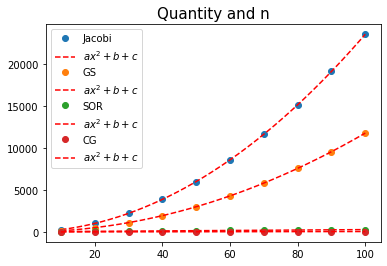

In [10]:
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
from scipy.optimize import *

#追赶法
def chase(a,b,c,f):
    n=np.size(b)
    x=np.zeros(n)
    y=np.zeros(n)
    l=np.zeros(n)
    u=np.zeros(n-1)
    l[0]=b[0]
    y[0]=f[0]/l[0]
    u[0]=c[0]/l[0]
    for i in range(1,n-1):
        l[i]=b[i]-a[i-1]*u[i-1]
        y[i]=(f[i]-y[i-1]*a[i-1])/l[i]
        u[i]=c[i]/l[i]
    l[n-1]=b[n-1]-a[n-2]*u[n-2]
    y[n-1]=(f[n-1]-y[n-2]*a[n-2])/l[n-1]
    x[n-1]=y[n-1]
    for i in range(n-2,-1,-1):
        x[i]=y[i]-u[i]*x[i+1]
    return x

#Jacobi迭代法
def Jacobi(A,b,eps):
    D=np.diag(np.diag(A))
    U=(D-np.triu(A))
    L=(D-np.tril(A))
    M=inv(D)
    err=1
    errs=list()
    step=0
    x=np.zeros(len(b))
    while err>eps:
        x=np.dot(np.dot(M,L+U),x)+np.dot(M,b)
        err=norm(b-np.dot(A,x))/norm(b)
        errs.append(err)
        step=step+1
    return [x,step]

#Gauss-Seidel迭代法
def GS(A,b,eps):
    D=np.diag(np.diag(A))
    U=(D-np.triu(A))
    L=(D-np.tril(A))
    M=inv(D-L)
    err=1
    errs=list()
    step=0
    x=np.zeros(len(b))
    while err>eps:
        x=np.dot(np.dot(M,U),x)+np.dot(M,b)
        err=norm(b-np.dot(A,x))/norm(b)
        errs.append(err)
        step+=1
    return [x,step]

#SOR迭代法
def SOR(A,b,w,eps):
    D=np.diag(np.diag(A))
    U=(D-np.triu(A))
    L=(D-np.tril(A))
    M=inv(D-w*L)
    err=1
    errs=list()
    step=0
    x=np.zeros(len(b))
    while err>eps:
        x=np.dot(np.dot(M,(1-w)*D+w*U),x)+w*np.dot(M,b)
        err=norm(b-np.dot(A,x))/norm(b)
        errs.append(err)
        step+=1
    return [x,step]

#共轭梯度法
def CG(A,b,eps):
    ndim=np.size(b)
    x=np.zeros(ndim)
    p=r=b-np.dot(A,x)
    k=0
    while k>=0:
        k=k+1
        a=np.linalg.norm(r)**2/np.dot(np.dot(p,A),p.reshape(1,-1).T)
        x=x+a*p
        r0=r
        r=r0-a*np.dot(A,p)
        if np.linalg.norm(r)<eps:
            return x,k
        else:
            b=np.linalg.norm(r)**2/np.linalg.norm(r0)**2
            p=r+b*p


#提取A,b
n=10
A=np.diag(2*np.ones(n))+np.diag(-np.ones(n-1),1)+np.diag(-np.ones(n-1),-1)
b=np.ones(n)
eps=10**-5

print('（1）取n=',n)
x=chase(-np.ones(n-1),2*np.ones(n),-np.ones(n-1),b)
print('追赶法的结果为',x)
x,k=Jacobi(A,b,eps)
print('\nJacobi迭代法的结果为',x,'迭代次数为',k)
x,k=GS(A,b,eps)
print('\nGauss-Seidel迭代法的结果为',x,'迭代次数为',k)
w=2-2*np.pi/(n+1)
x,k=SOR(A,b,w,eps)
print('\nSOR迭代法的结果为',x,'迭代次数为',k)
x,k=CG(A,b,eps)
print('\n共轭梯度法的结果为',x,'迭代次数为',k)

print('（2）')
print('此处只取n=10-100，点到为止，使用二次曲线拟合')

itk_J=list()
itk_GS=list()
itk_SOR=list()
itk_CG=list()
for i in range(10,101,10):
    n=i
    A=np.diag(2*np.ones(n))+np.diag(-np.ones(n-1),1)+np.diag(-np.ones(n-1),-1)
    b=np.ones(n)
    eps=10**-5
    x_J,k_J=Jacobi(A,b,eps)
    x_GS,k_GS=GS(A,b,eps)
    w=2-2*np.pi/(n+1)
    x_SOR,k_SOR=SOR(A,b,w,eps)
    x_CG,k_CG=CG(A,b,eps)
    itk_J.append(k_J)
    itk_GS.append(k_GS)
    itk_SOR.append(k_SOR)
    itk_CG.append(k_CG)

n=np.linspace(10,100,10)
nnew=np.linspace(10,100,1000)

def func(x,a,b,c):
    return a*x**2+b*x+c

#最小二乘拟合
popt_J,pcov_J=curve_fit(func,n,itk_J)
ffit_J=func(nnew,popt_J[0],popt_J[1],popt_J[2])
p_J=np.poly1d([popt_J[0],popt_J[1],popt_J[2]])
print('Jacobi最小二乘拟合多项式为：\n',p_J)

plt.plot(n,itk_J,'o',label='Jacobi')
plt.plot(nnew,ffit_J,'r--',label='$ax^2+b+c$')
plt.legend()
plt.grid()
plt.show

popt_GS,pcov_GS=curve_fit(func,n,itk_GS)
ffit_GS=func(nnew,popt_GS[0],popt_GS[1],popt_GS[2])
p_GS=np.poly1d([popt_GS[0],popt_GS[1],popt_GS[2]])
print('Gauss-Seidel最小二乘拟合多项式为：\n',p_GS)

plt.plot(n,itk_GS,'o',label='GS')
plt.plot(nnew,ffit_GS,'r--',label='$ax^2+b+c$')
plt.legend()
plt.grid()
plt.show

popt_SOR,pcov_SOR=curve_fit(func,n,itk_SOR)
ffit_SOR=func(nnew,popt_SOR[0],popt_SOR[1],popt_SOR[2])
p_SOR=np.poly1d([popt_SOR[0],popt_SOR[1],popt_SOR[2]])
print('SOR最小二乘拟合多项式为：\n',p_SOR)

plt.plot(n,itk_SOR,'o',label='SOR')
plt.plot(nnew,ffit_SOR,'r--',label='$ax^2+b+c$')
plt.legend()
plt.grid()
plt.show

popt_CG,pcov_CG=curve_fit(func,n,itk_CG)
ffit_CG=func(nnew,popt_CG[0],popt_CG[1],popt_CG[2])
p_CG=np.poly1d([popt_CG[0],popt_CG[1],popt_CG[2]])
print('CG最小二乘拟合多项式为：\n',p_CG)

plt.title('Quantity and n',size=15)
plt.plot(n,itk_CG,'o',label='CG')
plt.plot(nnew,ffit_CG,'r--',label='$ax^2+b+c$')
plt.legend()
plt.grid()
plt.show

## 3&emsp;作业
#### **1.&emsp;预处理共轭梯度法**
实验目的：共轭梯度法与预处理共轭梯度法<br/>
实验内容：考虑线性代数方程组$Ax=b$，其中$b$为纯$1$向量。系数矩阵$A=(a_{n,m})$的阶数$N=(N_x+1)(N_y+1)$，其中$N_x$和$N_y$为正整数；其元素按如下方式确定：对于任意正整数$n=1,2,\dots,N$，有
$$a_{n,m}=\begin{cases}
4&m=n\\
-1&m=n-(N_x+1)&m>0\\
-1&m=n+(N_x+1)&m>0\\
-1&m=n-1&m>0\\
-1&m=n+1&m>0\\
0&\text{其他}\\
\end{cases}$$
（1）编写程序，分别用共轭梯度法与预处理共轭梯度法（取预处理矩阵$M$为线性方程组系数矩阵的$A$的三条主对角元素所组成的三对角阵），求解该方程组。要求程序以$N_x$和$N_y$，最大迭代步数$K$和控制精度$\epsilon$为输入参数：停止迭代条件为$\dfrac{\left\|b-Ax_k\right\|}{\left\|b\right\|}<\epsilon$<br/>
（2）令$\epsilon=10^{-6},N_x=N_y=k$，分别取$n=100,200,300,\dots,1000$，用最小二乘法分析共轭迭代法的迭代次数与$k$的关系

（1）不妨取Nx=Ny=5
共轭梯度法的结果为：
Nx= 2 ，Ny= 2 时，解为 [-0.20783133 -0.10843373 -0.19277108 -0.06024096 -0.16566265 -0.06024096
 -0.19277108 -0.10843373 -0.20783133] 迭代次数为 5
预处理共轭梯度法的结果为：
Nx= 2 ，Ny= 2 时，解为 [-0.20783133 -0.10843373 -0.19277108 -0.06024096 -0.16566265 -0.06024096
 -0.19277108 -0.10843373 -0.20783133] 迭代次数为 4
（2）
本人的电脑运行不出1000000阶矩阵的结果，因此此处只取k=10-100，点到为止
Nx=Ny=k,N=(k+1)^2
k= 10 时，迭代次数为 29
k= 20 时，迭代次数为 55
k= 30 时，迭代次数为 79
k= 40 时，迭代次数为 102
k= 50 时，迭代次数为 124
k= 60 时，迭代次数为 145
k= 70 时，迭代次数为 166
k= 80 时，迭代次数为 186
k= 90 时，迭代次数为 206
k= 100 时，迭代次数为 227
最小二乘拟合多项式为：
  
2.174 x + 12.33


<function matplotlib.pyplot.show(*args, **kw)>

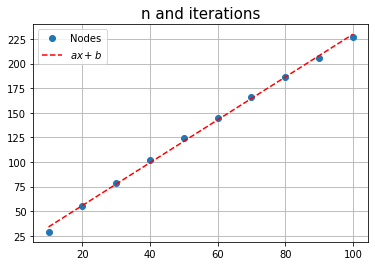

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import *

#共轭梯度法
def CG_N(Nx,Ny,eps):
    N=(Nx+1)*(Ny+1)
    b=np.ones(N)
    A=np.zeros((N,N))
    for m in range(N):
        for n in range(N):
            if n==m:
                A[m,n]=-4
            elif m==n-(Nx+1) or m==n+(Nx+1) or m==n-1 or m==n+1:
                A[m,n]=-1
    x=np.zeros(N)
    p=r=b-np.dot(A,x)
    k=0
    while k>=0:
        k=k+1
        a=np.linalg.norm(r)**2/np.dot(np.dot(p,A),p.reshape(1,-1).T)
        x=x+a*p
        r0=r
        r=r0-a*np.dot(A,p)
        if np.linalg.norm(r)<eps:
            return x,k
        else:
            b=np.linalg.norm(r)**2/np.linalg.norm(r0)**2
            p=r+b*p

#预处理共轭梯度法
def PCG_N(Nx,Ny,eps):
    N=(Nx+1)*(Ny+1)
    b=np.ones(N)
    A=np.zeros((N,N))
    for m in range(N):
        for n in range(N):
            if n==m:
                A[m,n]=-4
            elif m==n-(Nx+1) or m==n+(Nx+1) or m==n-1 or m==n+1:
                A[m,n]=-1
    M=np.diag(4*np.ones(N))+np.diag(np.ones(N-1),1)+np.diag(np.ones(N-1),-1)
    x=np.zeros(N)
    r=b-np.dot(A,x)
    z=np.dot(np.linalg.inv(M),r)
    p=z
    k=0
    while k>=0:
        k=k+1
        a=np.dot(r.T,z)/np.dot(np.dot(p,A),p.reshape(1,-1).T)
        x=x+a*p
        r0=r
        r=r0-a*np.dot(A,p)
        if np.linalg.norm(r)<eps:
            return x,k
        else:
            z0=z
            z=np.dot(np.linalg.inv(M),r)
            b=np.dot(z.T,r)/np.dot(z0.T,r0)
            p=z+b*p

print('（1）不妨取Nx=Ny=5')
#输入参数
Nx=2
Ny=2
eps=10**-6
print('共轭梯度法的结果为：')
x,step=CG_N(Nx,Ny,eps)
print('Nx=',Nx,'，Ny=',Ny,'时，解为',x,'迭代次数为',step)
print('预处理共轭梯度法的结果为：')
x,step=PCG_N(Nx,Ny,eps)
print('Nx=',Nx,'，Ny=',Ny,'时，解为',x,'迭代次数为',step)

print('（2）')
print('本人的电脑运行不出1000000阶矩阵的结果，因此此处只取k=10-100，点到为止')
print('Nx=Ny=k,N=(k+1)^2')
it=list()
for k in range(10,101,10):
    Nx=k
    Ny=k
    eps=10**-6
    x,step=CG_N(Nx,Ny,eps)
    it.append(step)
    print('k=',k,'时，迭代次数为',step)

k=np.linspace(10,100,10)
knew=np.linspace(10,100,1000)

def func(x,a,b):
    return a*x+b

#最小二乘拟合
popt,pcov=curve_fit(func,k,it)
ffit=func(knew,popt[0],popt[1])
p=np.poly1d([popt[0],popt[1]])
print('最小二乘拟合多项式为：\n',p)

plt.title('n and iterations',size=15)
plt.plot(k,it,'o',label='Nodes')
plt.plot(knew,ffit,'r--',label='$ax+b$')
plt.legend()
plt.grid()
plt.show